# Sagemaker & S3 setup

In [1]:
import sagemaker
from sagemaker import get_execution_role
import boto3
import pandas as pd

sagemaker_session = sagemaker.Session()
role = get_execution_role()
region = boto3.Session().region_name

bucket_name = 'vinod-sagemaker-regression-project'
input = f's3://{bucket_name}/input'
output = f's3://{bucket_name}/output'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[03/15/25 01:52:40] INFO     Found credentials from IAM Role:                                   ]8;id=516672;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=812196;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


[03/15/25 01:52:46] INFO     Found credentials from IAM Role:                                   ]8;id=31005;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=690130;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

[03/15/25 01:52:47] INFO     Found credentials from IAM Role:                                   ]8;id=351086;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=272172;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

# Data analysis

In [2]:
file_path = 's3://vinod-sagemaker-regression-project/input/Life Expectancy Data.csv'
df = pd.read_csv(file_path)
df.head()
# Life expectancy is the target colum

# find out what are the categorical columns - Country, Status
df.info()

# take a look at the numerical data
df.describe()

# see what are the columns having nulls
df.isnull().sum()

# lets look at the countries with highest and lowest life expectancy
df.rename(columns = lambda x: x.strip(), inplace = True) # the code below was failing and it turned out column names had leading/lagging spaces
analysis_df = df.groupby('Country', as_index=False)['Life expectancy'].mean()
analysis_df.sort_values('Life expectancy', ascending=False).head()
analysis_df.sort_values('Life expectancy', ascending=True).head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:283: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


[03/15/25 01:53:28] INFO     Found credentials from IAM Role:                                   ]8;id=190747;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=833222;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Country,Life expectancy
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375


# data visualization - 1

[03/15/25 01:54:25] INFO     generated new fontManager                                         ]8;id=352364;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=456525;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/font_manager.py#1639\1639]8;;\

/tmp/ipykernel_8644/123366582.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')
/tmp/ipykernel_8644/123366582.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist_kws=dict(edgecolor="k", linewidth=1, 

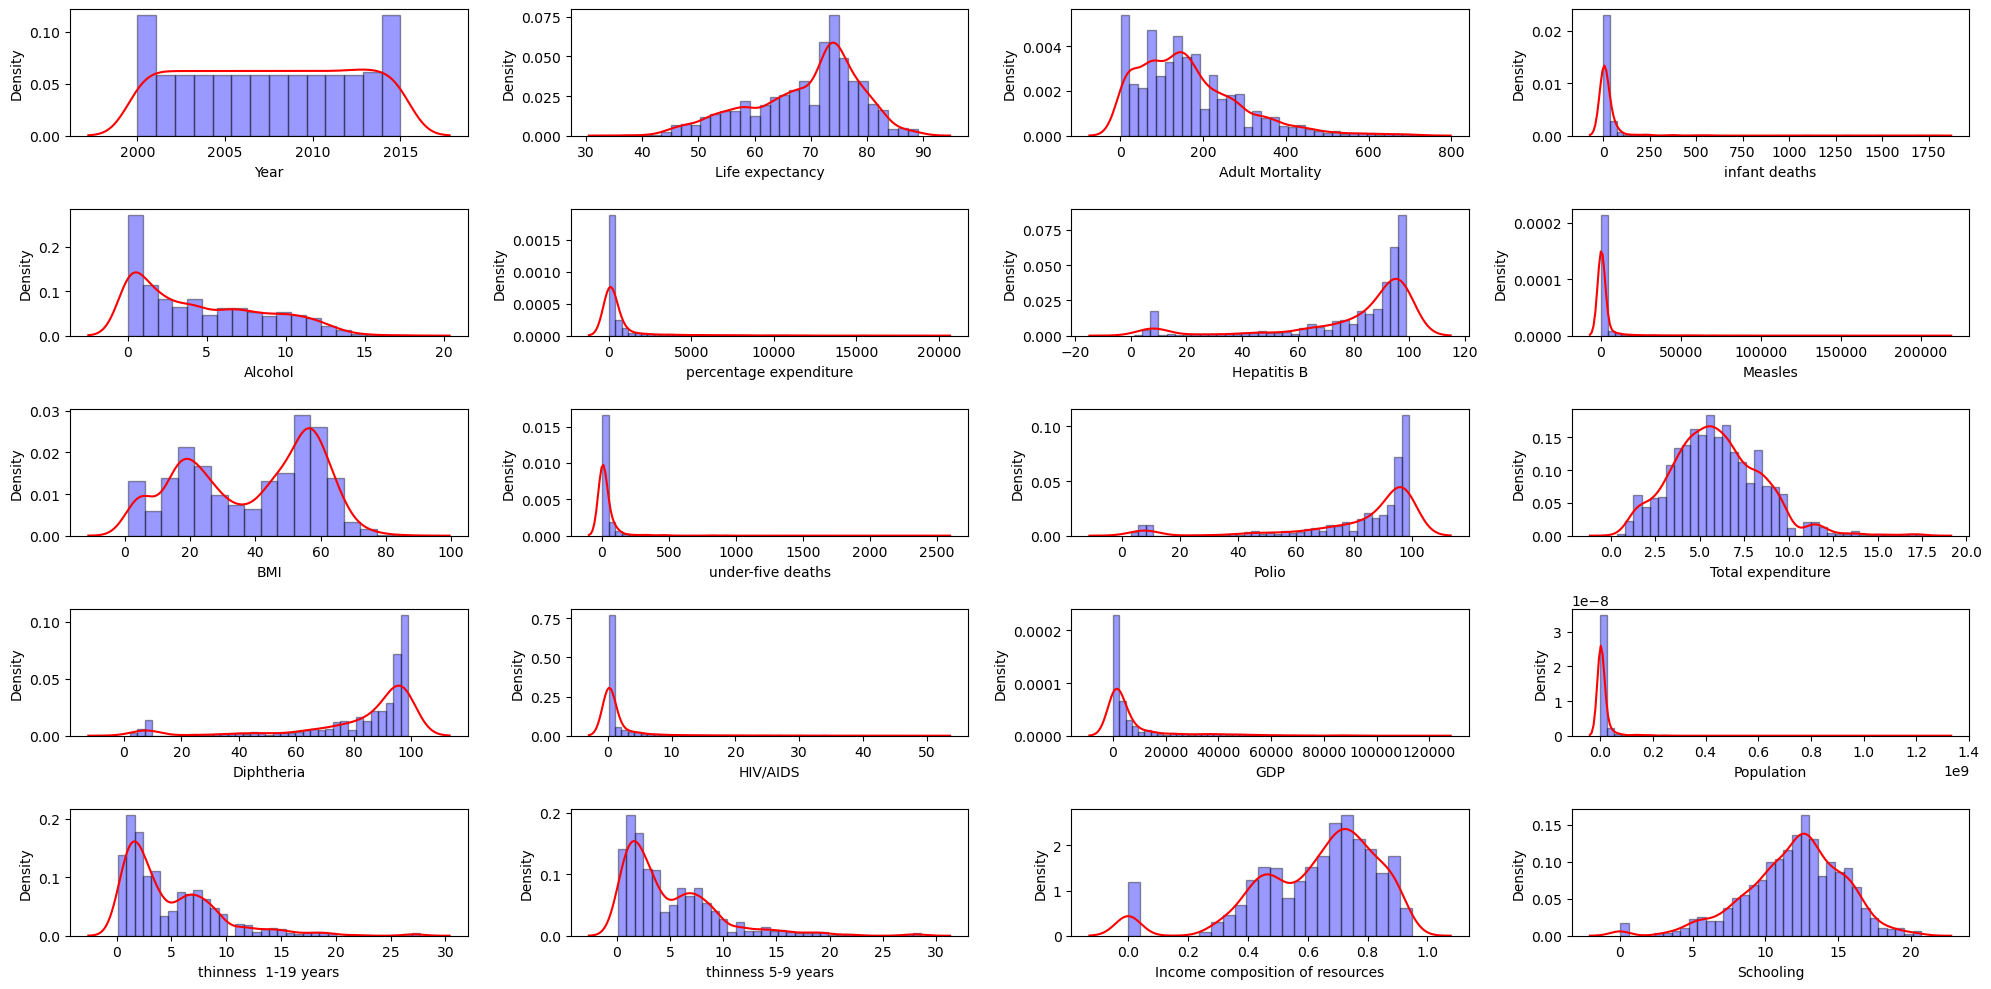

In [3]:
# see the distribution of values in each column
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
count = 1
fig = plt.figure(figsize = [20, 10])
cols = df.select_dtypes(exclude=['object']).columns.tolist()
for col in cols:
    plt.subplot(5, 4, count)
    sns.distplot(df[col], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')
    count += 1
plt.tight_layout()
plt.show()

# data visualization - 2

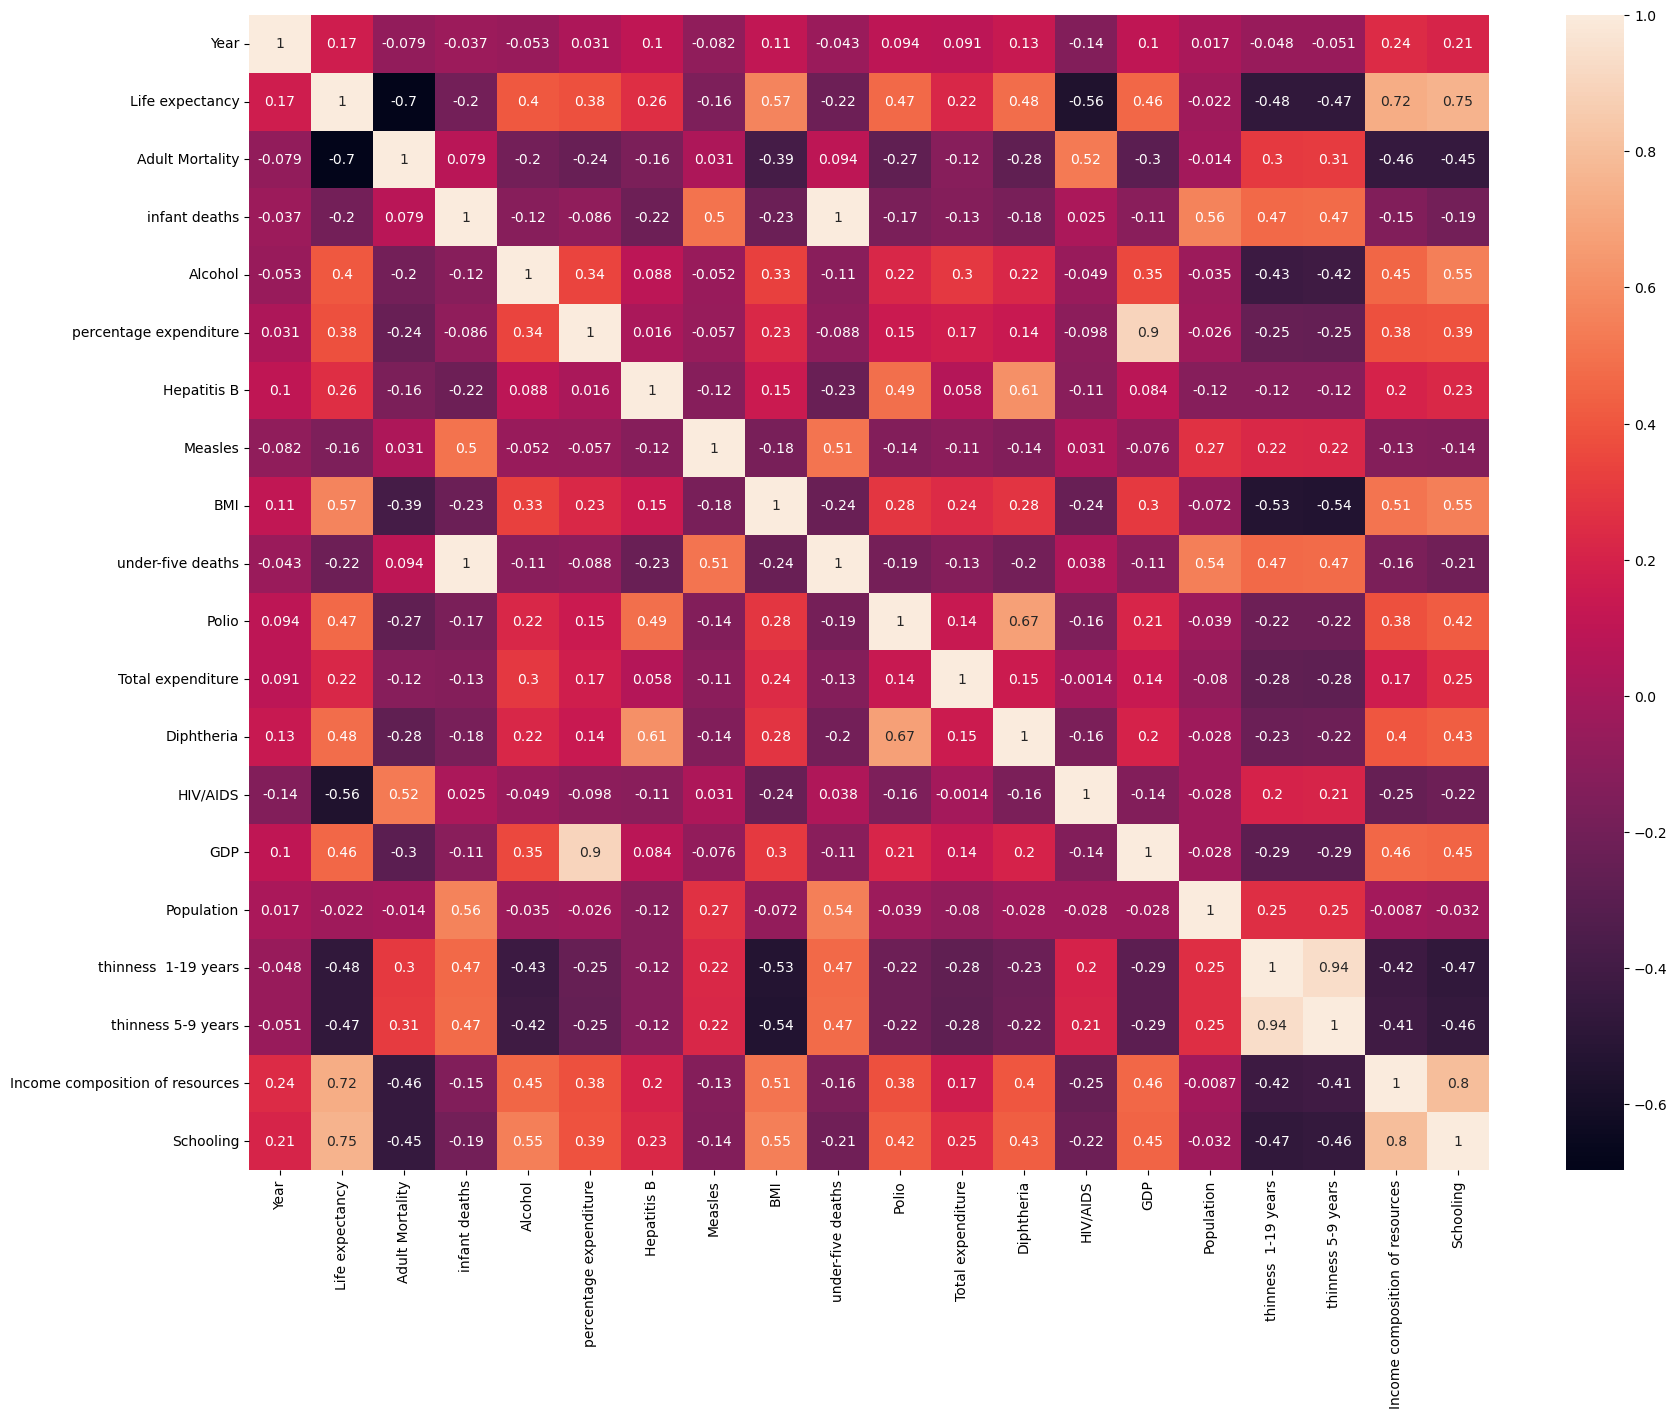

In [4]:
# correlation between different columns
plt.subplots(figsize=(20,15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

# data preparation

In [5]:
# Nothing seems to be unnecessary except year maybe
# we will keep all columns for now

# encoding of categorical columns
df['Country'].unique()
df['Country'].value_counts()
country_dummies = pd.get_dummies(df['Country'],prefix='country',drop_first=True)
country_dummies
df.drop(['Country'],axis=1, inplace=True)
df = pd.concat([df,country_dummies], axis=1)
df.head()

df['Status'].unique()
df['Status'].value_counts()
status_dummies = pd.get_dummies(df['Status'],prefix='status',drop_first=True)
status_dummies
df.drop(['Status'],axis=1,inplace=True)
df = pd.concat([df, status_dummies],axis=1)
df.head()

# handling numeric columns - nulls
# target column
df = df[df['Life expectancy'].notna()]
df.isnull().sum()

# feature columns
df['Alcohol'].value_counts() # most of the values are 0.01
alcohol_mode_value = df['Alcohol'].mode()[0]
alcohol_mode_value
df['Alcohol'].fillna(alcohol_mode_value, inplace=True)
df.isnull().sum()

df['Hepatitis B'].value_counts()
hepatitis_b_mode_value = df['Hepatitis B'].mode()[0]
hepatitis_b_mode_value
hepatitis_b_mean_value = df['Hepatitis B'].mean()
hepatitis_b_mean_value
df['Hepatitis B'].fillna(hepatitis_b_mean_value, inplace=True)
df.isnull().sum()

df['BMI'].value_counts()
bmi_mode_value = df['BMI'].mode()[0]
bmi_mode_value
bmi_mean_value = df['BMI'].mean()
bmi_mean_value
df['BMI'].fillna(bmi_mean_value, inplace=True)
df.isnull().sum()

df['Polio'].value_counts()
polio_mode_value = df['Polio'].mode()[0]
polio_mode_value
polio_mean_value = df['Polio'].mean()
polio_mean_value
df['Polio'].fillna(polio_mode_value, inplace=True)
df.isnull().sum()

df['Total expenditure'].value_counts()
total_expenditure_mode_value = df['Total expenditure'].mode()[0]
total_expenditure_mode_value
total_expenditure_mean_value = df['Total expenditure'].mean()
total_expenditure_mean_value
df['Total expenditure'].fillna(total_expenditure_mean_value, inplace=True)
df.isnull().sum()

df['GDP'].value_counts()
gdp_mode_value = df['GDP'].mode()[0]
gdp_mode_value
gdp_mean_value = df['GDP'].mean()
gdp_mean_value
df['GDP'].fillna(gdp_mean_value, inplace=True)
df.isnull().sum()

df['Population'].value_counts()
population_mean_value = df['Population'].mean()
population_mean_value
df['Population'].fillna(population_mean_value, inplace=True)
df.isnull().sum()

df['Diphtheria'].value_counts()
diphtheria_mode_value = df['Diphtheria'].mode()[0]
diphtheria_mode_value
diphtheria_mean_value = df['Diphtheria'].mean()
diphtheria_mean_value
df['Diphtheria'].fillna(diphtheria_mean_value, inplace=True)
df.isnull().sum()

df['thinness  1-19 years'].value_counts()
thinness_1_19_mode_value = df['thinness  1-19 years'].mode()[0]
thinness_1_19_mode_value
thinness_1_19_mean_value = df['thinness  1-19 years'].mean()
thinness_1_19_mean_value
df['thinness  1-19 years'].fillna(thinness_1_19_mean_value, inplace=True)
df.isnull().sum()

df['thinness 5-9 years'].value_counts()
thinness_5_9_mode_value = df['thinness 5-9 years'].mode()[0]
thinness_5_9_mode_value
thinness_5_9_mean_value = df['thinness 5-9 years'].mean()
thinness_5_9_mean_value
df['thinness 5-9 years'].fillna(thinness_5_9_mean_value, inplace=True)
df.isnull().sum()

df['Income composition of resources'].value_counts()
income_composition_mode_value = df['Income composition of resources'].mode()[0]
income_composition_mode_value
income_composition_mean_value = df['Income composition of resources'].mean()
income_composition_mean_value
df['Income composition of resources'].fillna(income_composition_mode_value,inplace=True)
df.isnull().sum()

df['Schooling'].value_counts()
schooling_mode_value = df['Schooling'].mode()[0]
schooling_mode_value
schooling_mean_value = df['Schooling'].mean()
schooling_mean_value
df['Schooling'].fillna(schooling_mean_value, inplace=True)
df.isnull().sum()

# handling outliers - all columns
# the number of records came down drastically from 2928 to 1312
# so handling outliers at a global level ddoesnt seem to be a good idea .. we need to check column by column

# Q1 = df[cols].quantile(0.25)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3 - Q1
# outliers = ((df[cols] < (Q1 - 1.7 * IQR)) | (df[cols] > (Q3 + 1.7 * IQR))).any(axis=1)
# df = df[~outliers]
# df.head()
# df.count()

# handling outliers column by column is done like this 
# but not doing outlier handling for now. will be done later if required

# df_desc = df.describe()
# df_desc
# df_desc['Measles']['25%']
# df_desc['Measles']['75%']
# iqr_measles = df_desc['Measles']['75%'] - df_desc['Measles']['25%']
# iqr_measles
# lower_threshold_measles = df_desc['Measles']['25%'] - (1.5*iqr_measles)
# upper_threshold_measles = df_desc['Measles']['75%'] + (1.5*iqr_measles)

# df[df['Measles'] < lower_threashold_measles]
# df[df['Measles'] > upper_threashold_measles] # huge number of rows returned

# such rows can be dropped like this
# df.drop(df[df['Measles'] < lower_threshold_measles].index, axis=0, inplace=True)
# df.drop(df[df['Measles'] > upper_threshold_measles].index, axis=0,  inplace=True)

# or you can replace the values with upper threshold like this
# df['Measles'] = np.where(df['Measles'] < lower_threshold_measles, lower_threshold_measles, df['Measles'])
# df['Measles'] = np.where(df['Measles'] > upper_threshold_measles, upper_threshold_measles, df['Measles'])

df.head(5)
# df.count()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cabo Verde,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Cook Islands,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czechia,country_Côte d'Ivoire,country_Democratic People's Republic of Korea,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Grenada,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran (Islamic Republic of),country_Iraq,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kuwait,country_Kyrgyzstan,country_Lao People's Democratic Republic,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Marshall Islands,country_Mauritania,country_Mauritius,country_Mexico,country_Micronesia (Federated States of),country_Monaco,country_Mongolia,country_Montenegro,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Niue,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Republic of Korea,country_Republic of Moldova,country_Romania,country_Russian Federation,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and the Grenadines,country_Samoa,country_San Marino,country_Sao Tome and Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe,status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0

# data preparation - sagemaker specific

In [6]:
# Split the data into features and target
# For Sagemaker, target column needs to be at the beginning
# Then split the data into training dataset and test dataset
# Then upload the training and test data files into S3

In [7]:
feature_columns = list(df.columns[~df.columns.isin(['Life expectancy'])])
feature_columns
target_column = 'Life expectancy'
df = df[[target_column] + feature_columns]

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.2)

train_file = 'train.csv'
test_file = 'test.csv'
train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)

s3 = boto3.client('s3')
s3.upload_file(train_file, bucket_name, f'train/{train_file}')
s3.upload_file(test_file, bucket_name, f'test/{test_file}')

from sagemaker.inputs import TrainingInput

content_type = "csv"
train_input = TrainingInput(f"s3://{bucket_name}/train/{train_file}", content_type=content_type)
test_input = TrainingInput(f"s3://{bucket_name}/test/{test_file}", content_type=content_type)

[03/15/25 02:05:04] INFO     Found credentials from IAM Role:                                   ]8;id=302705;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=623528;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

# Create model - customize existing algorithm on your data to create a new model

In [8]:
xgboost_container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name, "1.3-1")

hyperparameters = {
    "max_depth":"5",
    "eta":"0.2",
    "gamma":"40",
    "min_child_weight":"6",
    "subsample":"0.7",
    "objective":"reg:squarederror",
    "num_round":"50"
}

estimator = sagemaker.estimator.Estimator(
    image_uri = xgboost_container,
    hyperparameters = hyperparameters,
    role = sagemaker.get_execution_role(),
    instance_count = 1,
    instance_type = 'ml.m5.xlarge',
    volume = 5,
    output_path = output
)

estimator.fit({'train': train_input, 'validation': test_input})

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=115660;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=39007;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#528\528]8;;\

[02/23/25 04:12:38] INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=562477;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=274666;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py#90\90]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

                    INFO     Creating training-job with name:                                       ]8;id=699383;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=924942;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#1042\1042]8;;\
                             sagemaker-xgboost-2025-02-23-04-12-38-208                                             

2025-02-23 04:12:39 Starting - Starting the training job...
..25-02-23 04:12:54 Starting - Preparing the instances for training.
..25-02-23 04:13:35 Downloading - Downloading the training image.
.[2025-02-23 04:14:24.124 ip-10-0-156-255.ec2.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2025-02-23 04:14:24.148 ip-10-0-156-255.ec2.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2025-02-23:04:14:24:INFO] Imported framework sagemaker_xgboost_container.training
[2025-02-23:04:14:24:INFO] Failed to parse hyperparameter objective value reg:squarederror to Json.
Returning the value itself
[2025-02-23:04:14:24:INFO] No GPUs detected (normal if no gpus installed)
[2025-02-23:04:14:24:INFO] Running XGBoost Sagemaker in algorithm mode
[2025-02-23:04:14:24:INFO] Determined delimiter of CSV input is ','
[2025-02-23:04:14:24:INFO] Determined delimiter of CSV input is ','
[2025-02-23:04:14:24:INFO] files path: /opt/ml/input/data/train
[2025-02-23:04:14:2

# Deployment type 1 - real-time endpoint - using the estimator created above

In [9]:
predictor = estimator.deploy(initial_instance_count=1, instance_type='ml.m5.xlarge', endpoint_name='life-expectancy-predictor-1')
print(type(predictor))

[02/23/25 04:14:55] INFO     Creating model with name: sagemaker-xgboost-2025-02-23-04-14-55-193    ]8;id=692378;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=908042;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

                    INFO     Creating endpoint-config with name life-expectancy-predictor-1         ]8;id=186036;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=916188;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\

[02/23/25 04:14:56] INFO     Creating endpoint with name life-expectancy-predictor-1                ]8;id=572993;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=678508;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

-----!<class 'sagemaker.base_predictor.Predictor'>


In [10]:
# test data preparation - common for all prediction types

In [8]:
test_df = test_df.head(1)
test_df_features = test_df[feature_columns]
test_df_features_csv = test_df_features.to_csv(index=False, header=False).strip()
print(type(test_df_features_csv))

# feature_columns

<class 'str'>


# Prediction using deployment type 1

In [12]:
predictor.serializer = sagemaker.serializers.CSVSerializer()
predictor.deserializer = sagemaker.deserializers.JSONDeserializer()

response = predictor.predict(test_df_features_csv)
# print(response['predictions'])

# Metrics using deployment type 1

In [13]:
test_predictions_type_1 = []
for prediction in response['predictions']:
    test_predictions_type_1.append(prediction['score'])

test_predictions_type_1_df = pd.DataFrame(test_predictions_type_1)
# test_predictions_type_1_df.head(5)

test_actuals_df = test_df['Life expectancy']
# test_actuals_df

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(test_actuals_df, test_predictions_type_1_df)
mse = metrics.mean_squared_error(test_actuals_df, test_predictions_type_1_df)
rmse = metrics.root_mean_squared_error(test_actuals_df, test_predictions_type_1_df)
rsq = metrics.r2_score(test_actuals_df, test_predictions_type_1_df)
adj_rsq=1-(((1-rsq)*(586-1))/(586-202-1))
print('The mean absolute error is: ', mae)
print('The mean squared error is: ', mse)
print('The root mean squared error is: ', rmse)
print('The rsquared is: ', rsq)
print('The adjusted rsquared is: ', adj_rsq)

The mean absolute error is:  1.4958171089354635
The mean squared error is:  4.849486529754078
The root mean squared error is:  2.2021549740547504
The rsquared is:  0.9469115035446544
The adjusted rsquared is:  0.9189118265629839


# Hyper-parameter tuning

In [14]:
from sagemaker.tuner import HyperparameterTuner, IntegerParameter, ContinuousParameter

base_hyperparameters = {
    "objective": "reg:squarederror",
    "num_round": 25
}

# Define the Estimator
estimator = sagemaker.estimator.Estimator(
    image_uri=xgboost_container,
    hyperparameters=base_hyperparameters,
    role=role,
    instance_count=1,
    instance_type='ml.m5.xlarge',
    volume_size=5,  # 5 GB
    output_path=f's3://{bucket_name}/hyperparameter-tuning/output',
    sagemaker_session=sagemaker_session
)

hyperparameter_ranges = {
    'max_depth': IntegerParameter(3, 10),
    'eta': ContinuousParameter(0.1, 0.5),
    'gamma': ContinuousParameter(0, 5),
    'min_child_weight': IntegerParameter(1, 10),
    'subsample': ContinuousParameter(0.5, 1.0)
}

metric_definitions = [{
    'Name': 'validation:rmse',
    'Regex': '.*\\[validation-rmse\\] ([0-9\\.]+)'
}]

objective_metric_name = 'validation:rmse'

# Create the HyperparameterTuner
tuner = HyperparameterTuner(
    estimator=estimator,
    objective_metric_name=objective_metric_name,
    hyperparameter_ranges=hyperparameter_ranges,
    metric_definitions=metric_definitions,
    objective_type='Minimize',
    max_jobs=25,
    max_parallel_jobs=3
)

tuner.fit({
    'train': train_input,
    'validation': test_input
}, job_name='xgb-tuning-job-life-expectancy-4')  # Use a unique job name

[02/23/25 04:17:57] WARNING  No finished training job found associated with this estimator.       ]8;id=922894;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/estimator.py\estimator.py]8;;\:]8;id=208375;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/estimator.py#1914\1914]8;;\
                             Please make sure this estimator is only used for building workflow                    
                             config                                                                                

                    INFO     Creating hyperparameter tuning job with name:                          ]8;id=667731;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=569738;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#3383\3383]8;;\
                             xgb-tuning-job-life-expectancy-4                                                      

.........................................................................................................!


# retrieve best hyper-paramaters from above

In [15]:
import boto3

# Initialize Boto3 client
client = boto3.client('sagemaker')

# Describe the tuning job
tuning_job_name = 'xgb-tuning-job-life-expectancy-3'  # Replace with your tuning job name
response = client.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)

# Get the best training job
best_training_job = response['BestTrainingJob']
best_training_job_name = best_training_job['TrainingJobName']

# Describe the best training job
best_training_job_response = client.describe_training_job(TrainingJobName=best_training_job_name)

# Get the best hyperparameters
best_hyperparameters = best_training_job_response['HyperParameters']
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'_tuning_objective_metric': 'validation:rmse', 'eta': '0.36763986402077564', 'gamma': '1.5316862289652127', 'max_depth': '10', 'min_child_weight': '4', 'num_round': '25', 'objective': 'reg:squarederror', 'subsample': '0.8557401977939394'}


In [16]:
# use the best hyperparameters to create a new model

In [17]:
import boto3

best_hyperparameters = {
    "max_depth": "10",
    "eta":"0.36763986402077564",
    "gamma":"1.5316862289652127",
    "min_child_weight":"4",
    "subsample":"0.8557401977939394",
    "objective":"reg:squarederror",
    "num_round":"25"
}

estimator_best = sagemaker.estimator.Estimator(image_uri=xgboost_container, 
                                          hyperparameters=best_hyperparameters,
                                          role=sagemaker.get_execution_role(),
                                          instance_count=1, 
                                          instance_type='ml.m5.xlarge', 
                                          volume_size=5,  # 5 GB 
                                          output_path=output)


# Execute the XGBoost training job
estimator_best.fit({'train': train_input, 'validation': test_input})

[02/23/25 04:27:00] INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=219321;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=14317;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py#90\90]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

                    INFO     Creating training-job with name:                                       ]8;id=124109;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=750774;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#1042\1042]8;;\
                             sagemaker-xgboost-2025-02-23-04-27-00-653                                             

2025-02-23 04:27:01 Starting - Starting the training job...
..25-02-23 04:27:16 Starting - Preparing the instances for training.
..25-02-23 04:27:43 Downloading - Downloading input data.
.025-02-23 04:28:08 Downloading - Downloading the training image.
2025-02-23 04:28:54 Training - Training image download completed. Training in progress.
2025-02-23 04:28:54 Uploading - Uploading generated training model[2025-02-23 04:28:49.939 ip-10-0-243-8.ec2.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2025-02-23 04:28:49.963 ip-10-0-243-8.ec2.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2025-02-23:04:28:49:INFO] Imported framework sagemaker_xgboost_container.training
[2025-02-23:04:28:49:INFO] Failed to parse hyperparameter objective value reg:squarederror to Json.
Returning the value itself
[2025-02-23:04:28:49:INFO] No GPUs detected (normal if no gpus installed)
[2025-02-23:04:28:49:INFO] Running XGBoost Sagemaker in algorithm mode
[2025-02-23:

In [18]:
# deploy this tuned model

In [19]:
predictor_best = estimator_best.deploy(initial_instance_count=1, instance_type='ml.m5.xlarge', endpoint_name='life-expectancy-predictor-hyper-parameter')
print(type(predictor_best))

[02/23/25 04:29:48] INFO     Creating model with name: sagemaker-xgboost-2025-02-23-04-29-48-065    ]8;id=234929;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=97755;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

                    INFO     Creating endpoint-config with name                                     ]8;id=211515;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=527649;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\
                             life-expectancy-predictor-hyper-parameter                                             

                    INFO     Creating endpoint with name life-expectancy-predictor-hyper-parameter  ]8;id=746784;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=731500;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

-----!<class 'sagemaker.base_predictor.Predictor'>


# predict using this tuned model

In [20]:
predictor_best.serializer = sagemaker.serializers.CSVSerializer()
predictor_best.deserializer = sagemaker.deserializers.JSONDeserializer()

response_best = predictor_best.predict(test_df_features_csv)
# print(response_best['predictions'])

# metrics using this tuned model

In [21]:
test_predictions_type_11 = []
for prediction_best in response_best['predictions']:
    test_predictions_type_11.append(prediction_best['score'])

test_predictions_type_11_df = pd.DataFrame(test_predictions_type_11)
# test_predictions_type_11_df.head(5)

test_actuals_df = test_df['Life expectancy']
# test_actuals_df

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(test_actuals_df, test_predictions_type_11_df)
mse = metrics.mean_squared_error(test_actuals_df, test_predictions_type_11_df)
rmse = metrics.root_mean_squared_error(test_actuals_df, test_predictions_type_11_df)
rsq = metrics.r2_score(test_actuals_df, test_predictions_type_11_df)
adj_rsq=1-(((1-rsq)*(586-1))/(586-202-1))
print('The mean absolute error is: ', mae)
print('The mean squared error is: ', mse)
print('The root mean squared error is: ', rmse)
print('The rsquared is: ', rsq)
print('The adjusted rsquared is: ', adj_rsq)

# Note that below are the prior metrics
# We have seen improvement in metrics - reduction in error metrics and increase in R2 and Adj R2
# With 50 rounds, we might get even better metrics

# The mean absolute error is:  1.43334511896856
# The mean squared error is:  4.133285515051602
# The root mean squared error is:  2.0330483307220226
# The rsquared is:  0.9566735798352012
# The adjusted rsquared is:  0.9338225697221741

The mean absolute error is:  1.4006147313036608
The mean squared error is:  4.645115153000151
The root mean squared error is:  2.1552529208889037
The rsquared is:  0.9491488062041846
The adjusted rsquared is:  0.9223291165259739


# Deployment type 2 - real-time endpoint - using model artifact

In [22]:
# taking the model artifact of the hyper-parameter tuned model

from sagemaker.model import Model
model_artifact = 's3://vinod-sagemaker-regression-project/output/sagemaker-xgboost-2025-02-23-02-49-23-004/output/model.tar.gz'
container = sagemaker.image_uris.retrieve(framework="xgboost", region=boto3.Session().region_name, version="1.3-1")
model = Model(
    image_uri = container,
    model_data = model_artifact,
    role = get_execution_role()
)

predictor = model.deploy(initial_instance_count=1, instance_type='ml.m5.xlarge', endpoint_name='life-expectancy-predictor-2')
print(type(model))
print(type(predictor))

[02/23/25 04:32:50] INFO     Ignoring unnecessary instance type: None.                            ]8;id=306029;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=272020;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#528\528]8;;\

                    INFO     Creating model with name: sagemaker-xgboost-2025-02-23-04-32-50-503    ]8;id=526855;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=590377;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

[02/23/25 04:32:51] INFO     Creating endpoint-config with name life-expectancy-predictor-2         ]8;id=232098;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=805768;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\

                    INFO     Creating endpoint with name life-expectancy-predictor-2                ]8;id=618345;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=860574;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

-----!<class 'sagemaker.model.Model'>
<class 'NoneType'>


# Prediction using deployment type 2

In [23]:
import boto3
runtime_client = boto3.client('sagemaker-runtime')
endpoint_name = 'life-expectancy-predictor-2'

# Invoke the endpoint directly using the runtime client
response = runtime_client.invoke_endpoint(
    EndpointName=endpoint_name,
    ContentType="text/csv",  # Specify the content type
    Body=test_df_features_csv  # The input data as a CSV string
)

# Parse the response
result = response['Body'].read().decode('utf-8')
# print(result)

# Metrics using deployment type 2

In [24]:
import numpy as np
test_predictions_type_2_df = pd.DataFrame(list(map(lambda x: x.split('\n'), result.split("\n"))))
test_predictions_type_2_df.replace('', np.nan, inplace=True)
test_predictions_type_2_df.dropna(inplace=True)
test_predictions_type_2_df

test_actuals_df = test_df['Life expectancy']
test_actuals_df

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(test_actuals_df,test_predictions_type_2_df)
mse = metrics.mean_squared_error(test_actuals_df,test_predictions_type_2_df)
rmse = metrics.root_mean_squared_error(test_actuals_df,test_predictions_type_2_df)
rsq = metrics.r2_score(test_actuals_df,test_predictions_type_2_df)
adj_rsq=1-(((1-rsq)*(586-1))/(586-202-1))
print('The mean absolute error is: ', mae)
print('The mean squared error is: ', mse)
print('The root mean squared error is: ', rmse)
print('The rsquared is: ', rsq)
print('The adjusted rsquared is: ', adj_rsq)

The mean absolute error is:  0.7513241998978442
The mean squared error is:  1.3523398903576316
The root mean squared error is:  1.162901496412156
The rsquared is:  0.9851956096722442
The adjusted rsquared is:  0.977387550021574


# Deployment type 3 - serverless endpoint - using model artifact

In [25]:
from sagemaker.model import Model
from sagemaker.serverless import ServerlessInferenceConfig

model_artifact = 's3://vinod-sagemaker-regression-project/output/sagemaker-xgboost-2025-02-23-02-49-23-004/output/model.tar.gz'
container = sagemaker.image_uris.retrieve(framework="xgboost", region=boto3.Session().region_name, version="1.3-1")
model = Model(
    image_uri = container,
    model_data = model_artifact,
    role = get_execution_role()
)

serverless_inference_config = ServerlessInferenceConfig(
    memory_size_in_mb=4096,  # Allocate memory
    max_concurrency=2  # Max concurrent invocations
)

predictor = model.deploy(serverless_inference_config=serverless_inference_config, endpoint_name='life-expectancy-serverless-predictor')
print(type(model))
print(type(predictor))

[02/23/25 04:35:52] INFO     Ignoring unnecessary instance type: None.                            ]8;id=661555;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=806291;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#528\528]8;;\

                    INFO     Creating model with name: sagemaker-xgboost-2025-02-23-04-35-52-912    ]8;id=539142;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=650793;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

[02/23/25 04:35:53] INFO     Creating endpoint-config with name                                     ]8;id=664228;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=213821;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\
                             life-expectancy-serverless-predictor                                                  

                    INFO     Creating endpoint with name life-expectancy-serverless-predictor       ]8;id=582070;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=538038;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

----!<class 'sagemaker.model.Model'>
<class 'NoneType'>


# Prediction using deployment type 3

In [26]:
import boto3
runtime_client = boto3.client('sagemaker-runtime')
endpoint_name = 'life-expectancy-serverless-predictor'

# Invoke the endpoint directly using the runtime client
response = runtime_client.invoke_endpoint(
    EndpointName=endpoint_name,
    ContentType="text/csv",  # Specify the content type
    Body=test_df_features_csv  # The input data as a CSV string
)

# Parse the response
result = response['Body'].read().decode('utf-8')
# print(result)

# Metrics using deployment type 3

In [27]:
import numpy as np
test_predictions_type_3_df = pd.DataFrame(list(map(lambda x: x.split('\n'), result.split("\n"))))
test_predictions_type_3_df.replace('', np.nan, inplace=True)
test_predictions_type_3_df.dropna(inplace=True)
test_predictions_type_3_df

test_actuals_df = test_df['Life expectancy']
test_actuals_df

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(test_actuals_df,test_predictions_type_3_df)
mse = metrics.mean_squared_error(test_actuals_df,test_predictions_type_3_df)
rmse = metrics.root_mean_squared_error(test_actuals_df,test_predictions_type_3_df)
rsq = metrics.r2_score(test_actuals_df,test_predictions_type_3_df)
adj_rsq=1-(((1-rsq)*(586-1))/(586-202-1))
print('The mean absolute error is: ', mae)
print('The mean squared error is: ', mse)
print('The root mean squared error is: ', rmse)
print('The rsquared is: ', rsq)
print('The adjusted rsquared is: ', adj_rsq)

The mean absolute error is:  0.7513241998978442
The mean squared error is:  1.3523398903576316
The root mean squared error is:  1.162901496412156
The rsquared is:  0.9851956096722442
The adjusted rsquared is:  0.977387550021574


# Deployment and prediction - type 4 - batch transform - using model artifact 

In [28]:
# no endpoint is created here
# since endpoint is not readily available, transofmration will take time 
# ideal for batch loads and not for real-time inference

In [29]:
model_artifact = 's3://vinod-sagemaker-regression-project/output/sagemaker-xgboost-2025-02-23-02-49-23-004/output/model.tar.gz'
container = sagemaker.image_uris.retrieve(framework="xgboost", region=boto3.Session().region_name, version="1.3-1")

# below needed for batch_transform
test_features_file = 'test_features.csv'
test_df_features.to_csv(test_features_file, index=False, header=False)
s3.upload_file(test_features_file, bucket_name, f'test_features_only/{test_features_file}')

model = Model(
    image_uri = container,
    model_data = model_artifact,
    role = get_execution_role()
)

# Create a transformer object
transformer = model.transformer(
    instance_count=1,
    instance_type='ml.m5.large',  # Choose an instance type
    output_path=output,
    strategy='MultiRecord',  # Strategy for processing records (SingleRecord or MultiRecord)
    assemble_with='Line',  # How to join results, e.g., 'Line' to join with newlines
    accept='text/csv'  # Output format
)

# Start the transform job
transformer.transform(
    data='s3://vinod-sagemaker-regression-project/test_features_only/',  # Input data in S3
    content_type='text/csv',  # Input format
    split_type='Line'  # How the input data is split (e.g., by line)
)

# Wait for the job to finish
transformer.wait()

[02/23/25 04:38:26] INFO     Ignoring unnecessary instance type: None.                            ]8;id=663423;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=936033;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#528\528]8;;\

                    INFO     Creating model with name: sagemaker-xgboost-2025-02-23-04-38-26-458    ]8;id=874663;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=555765;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

[02/23/25 04:38:27] INFO     Creating transform job with name:                                      ]8;id=899883;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=585381;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#3951\3951]8;;\
                             sagemaker-xgboost-2025-02-23-04-38-27-019                                             

..........................[2025-02-23:04:42:47:INFO] No GPUs detected (normal if no gpus installed)
[2025-02-23:04:42:47:INFO] No GPUs detected (normal if no gpus installed)
[2025-02-23:04:42:47:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }
  server {
    listen 8080 deferred;
    client_max_body_size 0;
    keepalive_timeout 3;
    location ~ ^/(ping|invocations|execution-parameters) {
      proxy_set_header X-Forwarded-For $proxy_add_x_forwarded_for;
      proxy_set_header Host $http_host;
      proxy_redirect off;
      proxy_read_timeout 60s;
      proxy_pass http://gunicorn;
    }
    location / {
      return 404 "{}";
    }
  }
}
[2025-02-23 04:42:47 +0000] [15] [INFO] Starting gunicorn 

# Metrics using deployment type 4

In [30]:
file_path = 's3://vinod-sagemaker-regression-project/output/test_features.csv.out' # output of batch transform method - deployment type 4
test_predictions_type_4_df = pd.read_csv(file_path, header = None)
# test_predictions_type_4_df

test_actuals_df = test_df['Life expectancy']
# test_actuals_df

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(test_actuals_df,test_predictions_type_4_df)
mse = metrics.mean_squared_error(test_actuals_df,test_predictions_type_4_df)
rmse = metrics.root_mean_squared_error(test_actuals_df,test_predictions_type_4_df)
rsq = metrics.r2_score(test_actuals_df,test_predictions_type_4_df)
adj_rsq=1-(((1-rsq)*(586-1))/(586-202-1))
print('The mean absolute error is: ', mae)
print('The mean squared error is: ', mse)
print('The root mean squared error is: ', rmse)
print('The rsquared is: ', rsq)
print('The adjusted rsquared is: ', adj_rsq)

[02/23/25 04:43:31] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=171277;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=964685;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

The mean absolute error is:  0.7513241998978442
The mean squared error is:  1.3523398903576311
The root mean squared error is:  1.1629014964121558
The rsquared is:  0.9851956096722442
The adjusted rsquared is:  0.977387550021574


# Deployment Type 5 - asynchronous inference endpoint

In [31]:
# here you will NOT get the prediction immediately
# it will be available in s3 and you need to go there and check later
# very similar to batch transform but an endpoint exists - so prediction will be quicker than transformation ?

In [32]:
from sagemaker.async_inference import AsyncInferenceConfig

async_predictor = estimator_best.deploy(
    initial_instance_count=1, 
    instance_type='ml.m5.xlarge',
    async_inference_config = AsyncInferenceConfig(
         output_path=f's3://{bucket_name}/output/async-output',  # S3 path to store output
         max_concurrent_invocations_per_instance=2
    ),
    endpoint_name='life-expectancy-predictor-async-1'
)

                    INFO     Creating model with name: sagemaker-xgboost-2025-02-23-04-43-31-079    ]8;id=818742;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=268227;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

[02/23/25 04:43:32] INFO     Creating endpoint-config with name life-expectancy-predictor-async-1   ]8;id=551156;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=790520;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\

                    INFO     Creating endpoint with name life-expectancy-predictor-async-1          ]8;id=766046;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=599356;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

-----!

# Predict using deployment type 5

In [33]:
endpoint_name = 'life-expectancy-predictor-async-1'
input_location = 's3://vinod-sagemaker-regression-project/test_features_only/test_features.csv'

response = runtime_client.invoke_endpoint_async(
    EndpointName=endpoint_name, 
    InputLocation=input_location,
    InvocationTimeoutSeconds=300,  # Set timeout to allow sufficient time for processing
    ContentType='text/csv'
)
print(response)
print(f"Asynchronous inference request sent. Check S3 's3://{bucket_name}/output/async-output' for results.")

{'ResponseMetadata': {'RequestId': 'ed946346-237a-4ed6-ae47-442c0040dd3e', 'HTTPStatusCode': 202, 'HTTPHeaders': {'x-amzn-requestid': 'ed946346-237a-4ed6-ae47-442c0040dd3e', 'x-amzn-sagemaker-outputlocation': 's3://vinod-sagemaker-regression-project/output/async-output/9b5d2290-435b-49b3-89a2-05ff06bcbc44.out', 'x-amzn-sagemaker-failurelocation': 's3://sagemaker-us-east-1-100163808729/async-endpoint-failures/sagemaker-xgboost-2025-02-23-04-43-31-079-1740285811-2e00/9b5d2290-435b-49b3-89a2-05ff06bcbc44-error.out', 'date': 'Sun, 23 Feb 2025 04:46:34 GMT', 'content-type': 'application/json', 'content-length': '54', 'connection': 'keep-alive'}, 'RetryAttempts': 0}, 'OutputLocation': 's3://vinod-sagemaker-regression-project/output/async-output/9b5d2290-435b-49b3-89a2-05ff06bcbc44.out', 'FailureLocation': 's3://sagemaker-us-east-1-100163808729/async-endpoint-failures/sagemaker-xgboost-2025-02-23-04-43-31-079-1740285811-2e00/9b5d2290-435b-49b3-89a2-05ff06bcbc44-error.out', 'InferenceId': '65e

# Metrics using deployment type 5

In [34]:
file_path = 's3://vinod-sagemaker-regression-project/output/async-output/725617a5-4dcd-4664-9333-c1929ebbf05c.out' # output of batch traansform method - deployment type 4
test_predictions_type_5_df = pd.read_csv(file_path, header = None)
# test_predictions_type_5_df

test_actuals_df = test_df['Life expectancy']
# test_actuals_df

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(test_actuals_df, test_predictions_type_5_df)
mse = metrics.mean_squared_error(test_actuals_df, test_predictions_type_5_df)
rmse = metrics.root_mean_squared_error(test_actuals_df, test_predictions_type_5_df)
rsq = metrics.r2_score(test_actuals_df, test_predictions_type_5_df)
adj_rsq=1-(((1-rsq)*(586-1))/(586-202-1))
print('The mean absolute error is: ', mae)
print('The mean squared error is: ', mse)
print('The root mean squared error is: ', rmse)
print('The rsquared is: ', rsq)
print('The adjusted rsquared is: ', adj_rsq)

[02/23/25 04:46:34] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=425928;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=367023;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

The mean absolute error is:  10.910941306885599
The mean squared error is:  190.91953095369448
The root mean squared error is:  13.817363386467568
The rsquared is:  -1.0900420652999423
The adjusted rsquared is:  -2.1923619013067004


# Sagemaker Clarify

In [35]:
# Pre-training bias analysis

In [36]:
from sagemaker import clarify
sensitive_attribute = 'HIV/AIDS'
label_column = 'Life expectancy'
clarify_output = 's3://vinod-sagemaker-regression-project/output/clarify-output/pre-training-analysis'

bias_config = clarify.BiasConfig(
    label_values_or_threshold = [55],
    facet_name = sensitive_attribute,
    facet_values_or_threshold = [0.1],
    group_name = None
)

data_config = clarify.DataConfig(
    s3_data_input_path = f's3://{bucket_name}/train/{train_file}',
    s3_output_path = clarify_output,
    label = label_column,
    headers = df.columns.to_list(),
    dataset_type = 'text/csv'
)

clarify_processor = clarify.SageMakerClarifyProcessor(
    role = role,
    instance_count = 1,
    instance_type = 'ml.t3.medium',
    sagemaker_session = sagemaker_session
)

clarify_processor.run_pre_training_bias(
    data_config = data_config,
    data_bias_config = bias_config
)

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=116423;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=797560;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#528\528]8;;\

                    INFO     Analysis Config: {'dataset_type': 'text/csv', 'headers': ['Life        ]8;id=818894;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/clarify.py\clarify.py]8;;\:]8;id=519992;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/clarify.py#1987\1987]8;;\
                             expectancy', 'Year', 'Adult Mortality', 'infant deaths', 'Alcohol',                   
                             'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five                
                             deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS',                      
                             'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years',                    
                             'Income composition of resources', 'Schooling', 'country_Albania',                    
                             'country_Algeria', 'country_Angola', 'country_Antigua and Barbuda',                   
                             'country_Argentina', 'country_Armenia', 'country_Australia',                          
                             'country_Austria', 'country_Azerbaijan', 'country_Bahamas',                           
                             'country_Bahrain', 'country_Bangladesh', 'country_Barbados',                          
                             'country_Belarus', 'country_Belgium', 'country_Belize',                               
                             'country_Benin', 'country_Bhutan', 'country_Bolivia (Plurinational                    
                             State of)', 'country_Bosnia and Herzegovina', 'country_Botswana',                     
                             'country_Brazil', 'country_Brunei Darussalam', 'country_Bulgaria',                    
                             'country_Burkina Faso', 'country_Burundi', 'country_Cabo Verde',                      
                             'country_Cambodia', 'country_Cameroon', 'country_Canada',                             
                             'country_Central African Republic', 'country_Chad', 'country_Chile',                  
                             'country_China', 'country_Colombia', 'country_Comoros',                               
                             'country_Congo', 'country_Cook Islands', 'country_Costa Rica',                        
                             'country_Croatia', 'country_Cuba', 'country_Cyprus',                                  
                             'country_Czechia', "country_Côte d'Ivoire", "country_Democratic                       
                             People's Republic of Korea", 'country_Democratic Republic of the                      
                             Congo', 'country_Denmark', 'country_Djibouti', 'country_Dominica',                    
                             'country_Dominican Republic', 'country_Ecuador', 'country_Egypt',                     
                             'country_El Salvador', 'country_Equatorial Guinea', 'country_Eritrea',                
                             'country_Estonia', 'country_Ethiopia', 'country_Fiji',                                
                             'country_Finland', 'country_France', 'country_Gabon',                                 
                             'country_Gambia', 'country_Georgia', 'country_Germany',                               
                             'country_Ghana', 'country_Greece', 'country_Grenada',                                 
                             'country_Guatemala', 'country_Guinea', 'country_Guinea-Bissau',                       
                             'country_Guyana', 'country_Haiti', 'country_Honduras',                                
                             'country_Hungary', 'country_Iceland', 'country_India',                                
                             'country_Indonesia',

                    INFO     Creating processing-job with name                                      ]8;id=258163;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=866669;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#1575\1575]8;;\
                             Clarify-Pretraining-Bias-2025-02-23-04-46-34-290                                      

............................sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
We are not in a supported iso region, /bin/sh exiting gracefully with no changes.
INFO:sagemaker-clarify-processing:Starting SageMaker Clarify Processing job
INFO:analyzer.data_loading.data_loader_util:Analysis config path: /opt/ml/processing/input/config/analysis_config.json
INFO:analyzer.data_loading.data_loader_util:Analysis result path: /opt/ml/processing/output
INFO:analyzer.data_loading.data_loader_util:This host is algo-1.
INFO:analyzer.data_loading.data_loader_util:This host is the leader.
INFO:analyzer.data_loading.data_loader_util:Number of hosts in the cluster is 1.
INFO:sagemaker-clarify-processing:Running Python / Pandas based analyzer.
INFO:analyzer.data_loading.data_loader_factory:Dataset type: text/csv uri: /opt/ml/processing/input/data
INFO:sagemak

In [37]:
# post-training bias analysis

In [38]:
output_path = 's3://vinod-sagemaker-regression-project/output/clarify-output/post-training-analysis'

data_config = clarify.DataConfig(
    s3_data_input_path=f's3://{bucket_name}/train/{train_file}',
    s3_output_path=output_path,
    label=label_column,
    headers=df.columns.to_list(),
    dataset_type='text/csv'
)


# Define the model configuration
model_config = clarify.ModelConfig(
    # model_name=predictor_best.endpoint,
    endpoint_name=predictor_best.endpoint,
    instance_type='ml.m5.xlarge',
    instance_count=1,
    accept_type='text/csv'
)

# Run the model bias analysis
clarify_processor.run_bias(
    data_config=data_config,
    bias_config=bias_config,
    model_config=model_config,
    # model_predicted_label_config=clarify.ModelPredictedLabelConfig(probability_threshold=0.5),
    pre_training_methods='all',
    post_training_methods='all'
)


[02/23/25 04:54:30] WARNING  The endpoint attribute has been renamed in sagemaker>=2.            ]8;id=444755;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py\deprecations.py]8;;\:]8;id=295035;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py#34\34]8;;\
                             See: https://sagemaker.readthedocs.io/en/stable/v2.html for                           
                             details.                                                                              

                    INFO     Analysis Config: {'dataset_type': 'text/csv', 'headers': ['Life        ]8;id=963098;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/clarify.py\clarify.py]8;;\:]8;id=530011;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/clarify.py#1987\1987]8;;\
                             expectancy', 'Year', 'Adult Mortality', 'infant deaths', 'Alcohol',                   
                             'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five                
                             deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS',                      
                             'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years',                    
                             'Income composition of resources', 'Schooling', 'country_Albania',                    
                             'country_Algeria', 'country_Angola', 'country_Antigua and Barbuda',                   
                             'country_Argentina', 'country_Armenia', 'country_Australia',                          
                             'country_Austria', 'country_Azerbaijan', 'country_Bahamas',                           
                             'country_Bahrain', 'country_Bangladesh', 'country_Barbados',                          
                             'country_Belarus', 'country_Belgium', 'country_Belize',                               
                             'country_Benin', 'country_Bhutan', 'country_Bolivia (Plurinational                    
                             State of)', 'country_Bosnia and Herzegovina', 'country_Botswana',                     
                             'country_Brazil', 'country_Brunei Darussalam', 'country_Bulgaria',                    
                             'country_Burkina Faso', 'country_Burundi', 'country_Cabo Verde',                      
                             'country_Cambodia', 'country_Cameroon', 'country_Canada',                             
                             'country_Central African Republic', 'country_Chad', 'country_Chile',                  
                             'country_China', 'country_Colombia', 'country_Comoros',                               
                             'country_Congo', 'country_Cook Islands', 'country_Costa Rica',                        
                             'country_Croatia', 'country_Cuba', 'country_Cyprus',                                  
                             'country_Czechia', "country_Côte d'Ivoire", "country_Democratic                       
                             People's Republic of Korea", 'country_Democratic Republic of the                      
                             Congo', 'country_Denmark', 'country_Djibouti', 'country_Dominica',                    
                             'country_Dominican Republic', 'country_Ecuador', 'country_Egypt',                     
                             'country_El Salvador', 'country_Equatorial Guinea', 'country_Eritrea',                
                             'country_Estonia', 'country_Ethiopia', 'country_Fiji',                                
                             'country_Finland', 'country_France', 'country_Gabon',                                 
                             'country_Gambia', 'country_Georgia', 'country_Germany',                               
                             'country_Ghana', 'country_Greece', 'country_Grenada',                                 
                             'country_Guatemala', 'country_Guinea', 'country_Guinea-Bissau',                       
                             'country_Guyana', 'country_Haiti', 'country_Honduras',                                
                             'country_Hungary', 'country_Iceland', 'country_India',                                
                             'country_Indonesia',

                    INFO     Creating processing-job with name Clarify-Bias-2025-02-23-04-54-30-679 ]8;id=780459;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=802220;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#1575\1575]8;;\

............................sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
We are not in a supported iso region, /bin/sh exiting gracefully with no changes.
INFO:sagemaker-clarify-processing:Starting SageMaker Clarify Processing job
INFO:analyzer.data_loading.data_loader_util:Analysis config path: /opt/ml/processing/input/config/analysis_config.json
INFO:analyzer.data_loading.data_loader_util:Analysis result path: /opt/ml/processing/output
INFO:analyzer.data_loading.data_loader_util:This host is algo-1.
INFO:analyzer.data_loading.data_loader_util:This host is the leader.
INFO:analyzer.data_loading.data_loader_util:Number of hosts in the cluster is 1.
INFO:sagemaker-clarify-processing:Running Python / Pandas based analyzer.
INFO:analyzer.data_loading.data_loader_factory:Dataset type: text/csv uri: /opt/ml/processing/input/data
INFO:sagemak

In [39]:
# explainability

In [87]:
# Define output path
output_path = 's3://vinod-sagemaker-regression-project/output/clarify-output/explainability-analysis'

explainability_data_config = clarify.DataConfig(
    s3_data_input_path=f's3://{bucket_name}/train/{train_file}',
    s3_output_path=output_path,
    label=label_column,  # replace with your label column name
    headers=df.columns.to_list(),  # list of your dataset columns
    dataset_type='text/csv'
)

shap_config = clarify.SHAPConfig(
    seed=123,  # random seed for reproducibility
    num_samples=80,  # number of samples for SHAP
    agg_method="mean_abs",  # aggregation method for SHAP values
    use_logit=False  # set True for binary classification with logit function
)

clarify_processor = clarify.SageMakerClarifyProcessor(
    role=role,  # IAM role used for running the job
    instance_count=1,  # number of instances
    instance_type='ml.t3.medium',  # instance type
    sagemaker_session=sagemaker_session  # session object
)

clarify_processor.run_explainability(
    data_config=explainability_data_config,
    model_config=model_config,
    explainability_config=shap_config
)


# Monitoring the model

In [8]:
# Data Quality Monitor

In [9]:
from sagemaker.model_monitor import DataCaptureConfig
from sagemaker.model import Model

model_artifact = 's3://vinod-sagemaker-regression-project/output/sagemaker-xgboost-2025-02-23-04-27-00-653/output/model.tar.gz'
container = sagemaker.image_uris.retrieve(framework="xgboost", region=boto3.Session().region_name, version="1.3-1")

model = Model(
    image_uri = container,
    model_data = model_artifact,
    role = get_execution_role()
)

destination_s3_uri = 's3://vinod-sagemaker-regression-project/output/monitor'
data_capture_config = DataCaptureConfig(enable_capture=True, sampling_percentage=100, destination_s3_uri=destination_s3_uri)

predictor_monitor = model.deploy(
    initial_instance_count=1,
    instance_type="ml.m4.xlarge",
    endpoint_name='life-expectancy-predictor-3',
    data_capture_config=data_capture_config,
)

[03/15/25 02:07:12] INFO     Ignoring unnecessary instance type: None.                            ]8;id=809521;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=864899;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#530\530]8;;\

                    INFO     Creating model with name: sagemaker-xgboost-2025-03-15-02-07-12-579    ]8;id=32844;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=393928;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

[03/15/25 02:07:13] INFO     Creating endpoint-config with name life-expectancy-predictor-3         ]8;id=212869;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=386695;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\

                    INFO     Creating endpoint with name life-expectancy-predictor-3                ]8;id=169337;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=774492;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

------!

In [10]:
# capture data quality baseline data

In [11]:
from sagemaker.model_monitor import DefaultModelMonitor
from sagemaker.model_monitor.dataset_format import DatasetFormat

baseline_input_data = f"s3://{bucket_name}/train/{train_file}" 
baseline_data_quality_results = f"s3://{bucket_name}/baselining/data-quality/results" 

data_quality_monitor = DefaultModelMonitor(
    role=role,
    instance_count=1,
    instance_type='ml.t3.xlarge',
    volume_size_in_gb=20,
    max_runtime_in_seconds=3600,
)

data_quality_monitor.suggest_baseline(
    baseline_dataset=baseline_input_data,
    dataset_format=DatasetFormat.csv(header=True),
    output_s3_uri=baseline_data_quality_results,
    wait=True,
    logs=False
)

[03/15/25 02:11:35] INFO     Ignoring unnecessary instance type: None.                            ]8;id=924371;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=955843;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#530\530]8;;\

                    INFO     Creating processing-job with name                                      ]8;id=394252;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=650026;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#1575\1575]8;;\
                             baseline-suggestion-job-2025-03-15-02-11-35-910                                       

...........................................................!

In [12]:
# explore data quality baseline data

In [13]:
baseline_job = data_quality_monitor.latest_baselining_job

schema_df = pd.json_normalize(baseline_job.baseline_statistics().body_dict["features"])
schema_df.head(10)

constraints_df = pd.json_normalize(baseline_job.suggested_constraints().body_dict["features"])
constraints_df.head(10)

,name,inferred_type,completeness,num_constraints.is_non_negative
0,Life expectancy,Fractional,1.0,True
1,Year,Integral,1.0,True
2,Adult Mortality,Fractional,1.0,True
3,infant deaths,Integral,1.0,True
4,Alcohol,Fractional,1.0,True
5,percentage expenditure,Fractional,1.0,True
6,Hepatitis B,Fractional,1.0,True
7,Measles,Integral,1.0,True
8,BMI,Fractional,1.0,True
9,under-five deaths,Integral,1.0,True


In [ ]:
# schedule a data quality monitoring job
# the pre-processor script is required to convert the inference input & output in a format that can be understood by the data quality monitoring job

In [17]:
from sagemaker.model_monitor import CronExpressionGenerator, EndpointInput, DefaultModelMonitor
endpoint_name = 'life-expectancy-predictor-3'

# Create the monitoring schedule
schedule = data_quality_monitor.create_monitoring_schedule(
   monitor_schedule_name='dq-hourly-schedule',
   output_s3_uri='s3://vinod-sagemaker-regression-project/output/monitor/data-quality/hourly-job-results/',
   # post_analytics_processor_script="s3://vinod-sagemaker-regression-project/code/preprocessornew.py",
   record_preprocessor_script="s3://vinod-sagemaker-regression-project/code/preprocessornew.py",
   schedule_cron_expression=CronExpressionGenerator.hourly(),
   statistics=data_quality_monitor.baseline_statistics(),
   constraints=data_quality_monitor.suggested_constraints(),
   enable_cloudwatch_metrics=True,
   endpoint_input=EndpointInput(
        endpoint_name=endpoint_name,
        destination="/opt/ml/processing/input/endpoint"
   )
)

# Print the schedule response
print(schedule)

desc_schedule_result = data_quality_monitor.describe_schedule()
print("STATUS: {}".format(desc_schedule_result["MonitoringScheduleStatus"]))

STATUS: Scheduled


In [ ]:
# for pre-processor script understanding

data = "a,b,c"
print ({ str(i).zfill(10) : d for i, d in enumerate(data.split(",")) })

In [ ]:
# predict output for new data after data quality monitoring job is scheduled

In [ ]:
new_file_path = 's3://vinod-sagemaker-regression-project/input/new features one.csv'
new_df = pd.read_csv(new_file_path, header=None)
new_df.head()
new_df_features_csv = new_df.to_csv(index=False, header=False).strip()
new_df_features_csv

'2000,243.0,15.0,2.32,0,77.0,122.0,42.6,20.0,74.0,5.67,75,0.1,7494.210719,12764541.77,1.5,1.4,0.6,13.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1'

In [16]:
import boto3
runtime_client = boto3.client('sagemaker-runtime')
endpoint_name = 'life-expectancy-predictor-3'

new_file_path = 's3://vinod-sagemaker-regression-project/input/new features one.csv'
new_df = pd.read_csv(new_file_path, header=None)
# new_df.head()

new_df_features_csv = new_df.to_csv(index=False, header=False).strip()
# print(type(new_df_features_csv))
# print(new_df_features_csv)

# Invoke the endpoint directly using the runtime client
response = runtime_client.invoke_endpoint(
    EndpointName=endpoint_name,
    ContentType="text/csv",  # Specify the content type
    Body=new_df_features_csv  # The input data as a CSV string
)

# Parse the response
# result = response['Body'].read().decode('utf-8').replace('\n',',')
# result = response['Body'].read()
# print(type(result))
result = response['Body'].read().decode('utf-8')
print(result)

63.44070053100586



In [19]:
# check if data quality monitoring job has run

In [21]:
my_executions = data_quality_monitor.list_executions()
my_executions
latest_execution = my_executions[-1]  # Latest execution's index is -1
print("Latest execution status: {}".format(latest_execution.describe()["ProcessingJobStatus"]))
print("Latest execution result: {}".format(latest_execution.describe()["ExitMessage"]))

report_uri = latest_execution.output.destination
print("Report Uri: {}".format(report_uri))

In [40]:
# analyze data quality violations found during monitoring

In [ ]:
import boto3
import json

# Initialize the S3 client
s3 = boto3.client('s3')

# Define your bucket name and the key
key = 'output/monitor/hourly-job-results//life-expectancy-predictor-3/hourly-schedule/2025/03/01/04/constraint_violations.json'

# Try to download the file
try:
    s3.download_file(bucket_name, key, 'constraint_violations.json')
    print("File downloaded successfully.")

    # Load and process the JSON file
    with open('constraint_violations.json', 'r') as f:
        violations = json.load(f)

    constraint_violations_df = pd.json_normalize(violations['violations'])
    pd.set_option("display.max_colwidth", None)
    print(constraint_violations_df.head(10))

except Exception as e:
    print(f"An error occurred: {e}")

In [24]:
import json
import pandas as pd

# Load the JSON data from the file
with open('constraint_violations.json', 'r') as f:
    violations = json.load(f)
    
# Convert the 'violations' section of the JSON data into a DataFrame
constraint_violations_df = pd.json_normalize(violations['violations'])

# Set Pandas options to display the full width of each column
pd.set_option("display.max_colwidth", None)

# Display the first few rows of the DataFrame
constraint_violations_df.head(10)

In [90]:
# Model Quality monitor

In [18]:
from sagemaker import get_execution_role, session, Session
from sagemaker.model_monitor import ModelQualityMonitor
from sagemaker.model_monitor.dataset_format import DatasetFormat

role = get_execution_role()
session = Session()

model_quality_monitor = ModelQualityMonitor(
    role=role,
    instance_count=1,
    instance_type='ml.t3.large',
    volume_size_in_gb=20,
    max_runtime_in_seconds=1800,
    sagemaker_session=session
)

baseline_model_quality_data_with_ground_truth = "s3://vinod-sagemaker-regression-project/train/train_ground.csv" 
baseline_model_quality_results = f"s3://{bucket_name}/baselining/model-quality/results" 

baseline_job_name = "ModelQualityBaselineJob5"
job = model_quality_monitor.suggest_baseline(
    job_name=baseline_job_name,
    baseline_dataset=baseline_model_quality_data_with_ground_truth, # The S3 location of the validation dataset.
    dataset_format=DatasetFormat.csv(header=True),
    output_s3_uri = baseline_model_quality_results, # The S3 location to store the results.
    problem_type='Regression',
    inference_attribute= "pred", # The column in the dataset that contains predictions.
    ground_truth_attribute= "Life expectancy" # The column in the dataset that contains ground truth labels.
)
job.wait(logs=False)

[03/15/25 02:19:54] INFO     Ignoring unnecessary instance type: None.                            ]8;id=793387;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=678224;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#530\530]8;;\

                    INFO     Creating processing-job with name ModelQualityBaselineJob5             ]8;id=652771;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=806725;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#1575\1575]8;;\

...........................................................!

In [19]:
# explore the baseline model metrics

In [20]:
import pandas as pd
baseline_job = model_quality_monitor.latest_baselining_job
pd.DataFrame(baseline_job.suggested_constraints().body_dict["regression_constraints"]).T

,threshold,comparison_operator
mae,2.0,GreaterThanThreshold
mse,4.0,GreaterThanThreshold
rmse,2.0,GreaterThanThreshold
r2,0.956398,LessThanThreshold


In [ ]:
# schedule a model quality monitoring job

In [ ]:
from sagemaker.model_monitor import CronExpressionGenerator, EndpointInput, DefaultModelMonitor
endpoint_name = 'life-expectancy-predictor-3'

# As per the start_time_offset and end_time_offset given here, the model quality monitoring job running at 7 PM will look at all invocations between 5 PM and 6 PM
schedule = model_quality_monitor.create_monitoring_schedule(
        monitor_schedule_name='prj-mq-hourly-schedule',
        output_s3_uri="s3://vinod-sagemaker-regression-project/output/monitor/model-quality/hourly-job-results",
        problem_type="Regression",
        ground_truth_input="s3://vinod-sagemaker-regression-project/ground-truth",
        constraints=model_quality_monitor.latest_baselining_job.suggested_constraints(),
        schedule_cron_expression=CronExpressionGenerator.hourly(),
        enable_cloudwatch_metrics=True,
        endpoint_input=EndpointInput(
           endpoint_name=endpoint_name,
           destination="/opt/ml/processing/input/endpoint",
           inference_attribute="data",
           start_time_offset="-PT2H",
           end_time_offset="-PT1H"
         )
    )

# Print the schedule response
print(schedule)

desc_schedule_result = model_quality_monitor.describe_schedule()
print("STATUS: {}".format(desc_schedule_result["MonitoringScheduleStatus"]))

STATUS: Scheduled


In [24]:
# predict for new data after model quality monitoring job is scheduled

In [41]:
import boto3
runtime_client = boto3.client('sagemaker-runtime')
endpoint_name = 'life-expectancy-predictor-3'

new_file_path = 's3://vinod-sagemaker-regression-project/input/new features one.csv'
new_df = pd.read_csv(new_file_path, header=None)
# new_df.head()

new_df_features_csv = new_df.to_csv(index=False, header=False).strip()
# print(type(new_df_features_csv))
# print(new_df_features_csv)

# Invoke the endpoint directly using the runtime client
response = runtime_client.invoke_endpoint(
    EndpointName=endpoint_name,
    ContentType="text/csv",  # Specify the content type
    Body=new_df_features_csv, # The input data as a CSV string
    InferenceId="56efcf0e-17f6-4990-b7a5-ebea15c5eef8"
)

# Parse the response
# result = response['Body'].read().decode('utf-8').replace('\n',',')
# result = response['Body'].read()
# print(type(result))
result = response['Body'].read().decode('utf-8')
print(result)

63.44070053100586



In [26]:
# check if model quality monitoring job has run

In [27]:
my_executions = model_quality_monitor.list_executions()
my_executions
latest_execution = my_executions[-1]  # Latest execution's index is -1
print("Latest execution status: {}".format(latest_execution.describe()["ProcessingJobStatus"]))
print("Latest execution result: {}".format(latest_execution.describe()["ExitMessage"]))

report_uri = latest_execution.output.destination
print("Report Uri: {}".format(report_uri))

Latest execution status: Failed
Latest execution result: Error: Errors occurred when merging your data. Please check CloudWatch logs for more details.
Report Uri: s3://vinod-sagemaker-regression-project/output/monitor/model-quality/hourly-job-results/merge


In [43]:
# sagemaker_client = boto3.client('sagemaker')

# response_start = sagemaker_client.start_monitoring_schedule(
#     MonitoringScheduleName='prj-mq-hourly-schedule'
# )

# print(response_start)

response_desc = sagemaker_client.describe_monitoring_schedule(
    MonitoringScheduleName='prj-mq-hourly-schedule'
)

print(response_desc)

{'MonitoringScheduleArn': 'arn:aws:sagemaker:us-east-1:100163808729:monitoring-schedule/prj-mq-hourly-schedule', 'MonitoringScheduleName': 'prj-mq-hourly-schedule', 'MonitoringScheduleStatus': 'Scheduled', 'MonitoringType': 'ModelQuality', 'CreationTime': datetime.datetime(2025, 3, 15, 2, 36, 9, 418000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2025, 3, 15, 7, 8, 37, 618000, tzinfo=tzlocal()), 'MonitoringScheduleConfig': {'ScheduleConfig': {'ScheduleExpression': 'cron(0 * ? * * *)'}, 'MonitoringJobDefinitionName': 'model-quality-job-definition-2025-03-15-02-36-08-803', 'MonitoringType': 'ModelQuality'}, 'EndpointName': 'life-expectancy-predictor-3', 'LastMonitoringExecutionSummary': {'MonitoringScheduleName': 'prj-mq-hourly-schedule', 'ScheduledTime': datetime.datetime(2025, 3, 15, 7, 0, tzinfo=tzlocal()), 'CreationTime': datetime.datetime(2025, 3, 15, 7, 2, 28, 475000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2025, 3, 15, 7, 8, 37, 604000, tzinfo=tzlocal

In [30]:
# analyze model quality violations

In [ ]:
import boto3
import json

# Initialize the S3 client
s3 = boto3.client('s3')

# Define your bucket name and the key
key = 'output/monitor/hourly-job-results//life-expectancy-predictor-3/hourly-schedule/2025/03/01/04/constraint_violations.json'

# Try to download the file
try:
    s3.download_file(bucket_name, key, 'constraint_violations.json')
    print("File downloaded successfully.")

    # Load and process the JSON file
    with open('constraint_violations.json', 'r') as f:
        violations = json.load(f)

    constraint_violations_df = pd.json_normalize(violations['violations'])
    pd.set_option("display.max_colwidth", None)
    print(constraint_violations_df.head(10))

except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
import json
import pandas as pd

# Load the JSON data from the file
with open('constraint_violations.json', 'r') as f:
    violations = json.load(f)
    
# Convert the 'violations' section of the JSON data into a DataFrame
constraint_violations_df = pd.json_normalize(violations['violations'])

# Set Pandas options to display the full width of each column
pd.set_option("display.max_colwidth", None)

# Display the first few rows of the DataFrame
constraint_violations_df.head(10)

In [86]:
# stop and delete the monitoring schedule

In [85]:
# import time
# data_quality_monitor.stop_monitoring_schedule()
# data_quality_monitor.delete_monitoring_schedule()
# time.sleep(60)  # Wait for the deletion/

import time
model_quality_monitor.stop_monitoring_schedule()
model_quality_monitor.delete_monitoring_schedule()
time.sleep(60)  # Wait for the deletion/

# uing boto3
# stop and delete monitoring schedule

# client = boto3.client('sagemaker')
# response_1 = client.stop_monitoring_schedule(
#        MonitoringScheduleName='hourly-schedule'
# )
# response_2 = client.delete_monitoring_schedule(
#     MonitoringScheduleName='hourly-schedule'
# )


[03/09/25 12:27:31] INFO     Stopping Monitoring Schedule with name: prj-mq-hourly-schedule         ]8;id=154673;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=904953;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#2225\2225]8;;\

[03/09/25 12:27:42] INFO     Deleting Monitoring Schedule with name: prj-mq-hourly-schedule         ]8;id=432416;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=770695;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#2237\2237]8;;\

[03/09/25 12:27:52] INFO     Deleting Model Quality Job Definition with name:              ]8;id=937210;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/model_monitor/model_monitoring.py\model_monitoring.py]8;;\:]8;id=648115;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/model_monitor/model_monitoring.py#3371\3371]8;;\
                             model-quality-job-definition-2025-03-09-03-14-56-184                                  

# Ensure you delete all endpoints and the notebook instance after the exercise